![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [182]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


In [183]:
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


# **1/**

<AxesSubplot: xlabel='Hour', ylabel='count'>

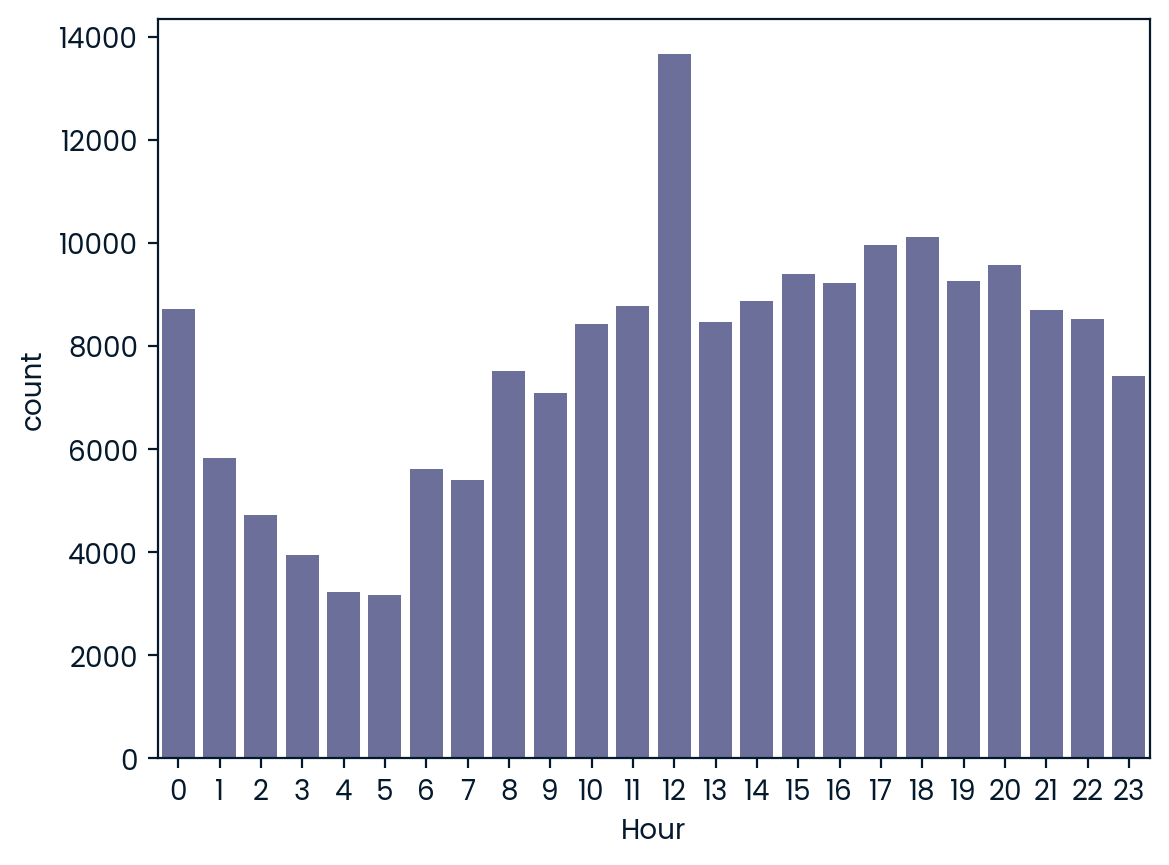

In [184]:
crimes["Hour"]=crimes["TIME OCC"].str[0:2].astype(int)
sns.countplot(data=crimes,x='Hour')

In [185]:
crimes['Hour'].value_counts().head()

12    13663
18    10125
17     9964
20     9579
15     9393
Name: Hour, dtype: int64

In [186]:
peak_crime_hour=int(crimes['Hour'].value_counts().index[0])

# **2/**

In [187]:
crimes[(crimes["Hour"].isin(range(22,24))) | (crimes["Hour"].isin(range(0,4)))]['Hour'].value_counts()

0     8728
22    8531
23    7419
1     5836
2     4726
3     3943
Name: Hour, dtype: int64

In [188]:
night_crimes=crimes[(crimes["Hour"].isin(range(22,24))) | (crimes["Hour"].isin(range(0,4)))]

In [189]:
night_crimes.groupby("AREA NAME")["Hour"].count().sort_values(ascending=False)

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: Hour, dtype: int64

<AxesSubplot: xlabel='AREA NAME'>

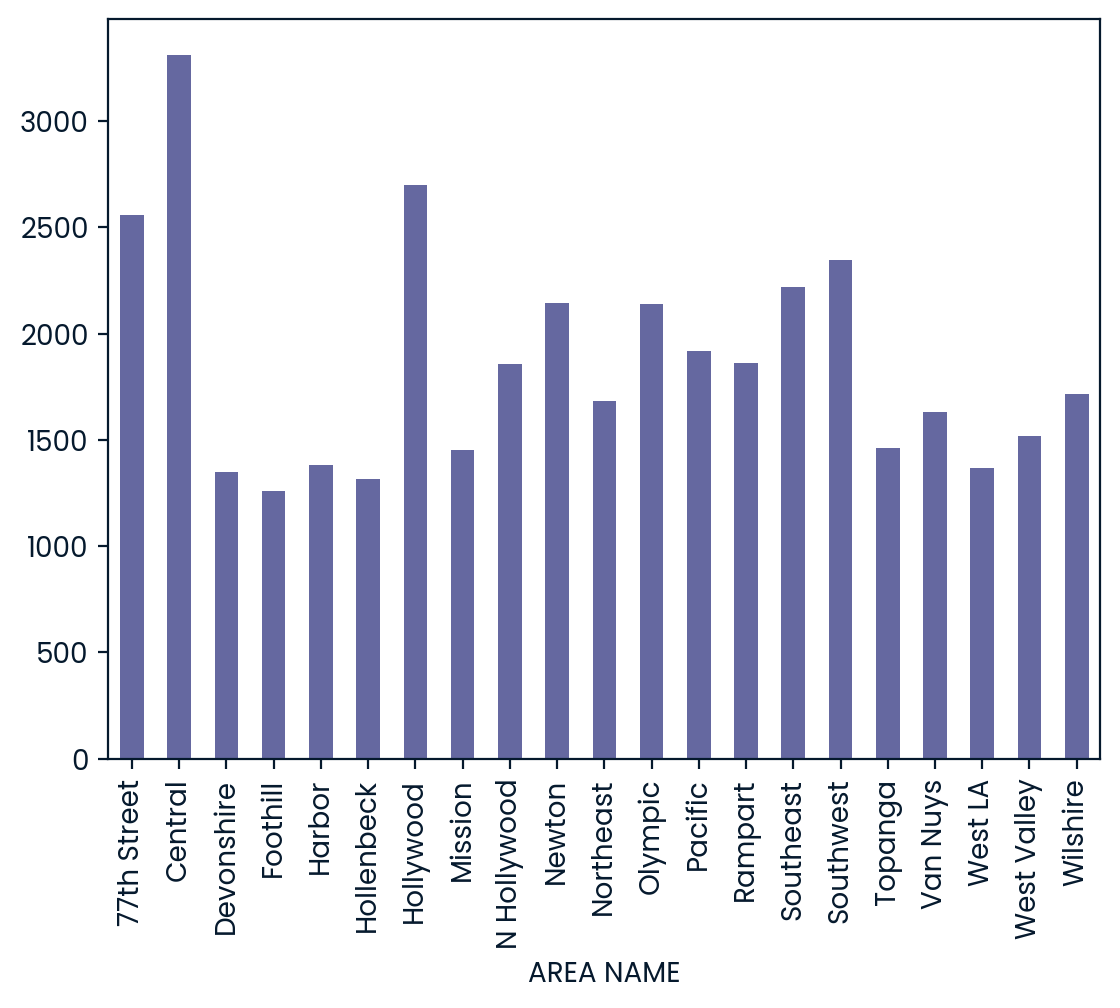

In [190]:
peak_night_crime_location=night_crimes.groupby("AREA NAME")["Hour"].count()
peak_night_crime_location.plot(kind='bar')

In [191]:
peak_night_crime_location=night_crimes.groupby("AREA NAME")["Hour"].count().sort_values(ascending=False).index[0]

# **3/**

In [192]:
age_bins=[0,17,25,34,44,54,64, crimes['Vict Age'].max()]
age_labels=["0-17","18-25","26-34","35-44","45-54","55-64","65+"]
crimes["Age Range"]=pd.cut(crimes["Vict Age"],bins=bins,labels=labels)
crimes[['Vict Age','Age Range']].head(10)

,Vict Age,Age Range
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+
5,28,26-34
6,33,26-34
7,35,35-44
8,72,65+
9,21,18-25


In [193]:
victim_ages=crimes["Age Range"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Range, dtype: int64